In [1]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()

  Activating project at `~/Documents/pulses/lecture-notebooks/Lecture 3`


In [2]:
using LinearAlgebra
using ForwardDiff
using PyPlot

In [3]:
function f(x)
    return x.^4 + x.^3 - x.^2 - x
end

f (generic function with 1 method)

In [4]:
function ∇f(x)
    return 4.0*x.^3 + 3.0*x.^2 - 2.0*x - 1.0
end

∇f (generic function with 1 method)

In [5]:
function ∇2f(x)
    return 12.0*x.^2 + 6.0*x - 2.0
end

∇2f (generic function with 1 method)

In [6]:
x = LinRange(-1.75,1.25,1000)

1000-element LinRange{Float64, Int64}:
 -1.75, -1.747, -1.74399, -1.74099, …, 1.24099, 1.24399, 1.247, 1.25

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x167730ce0>

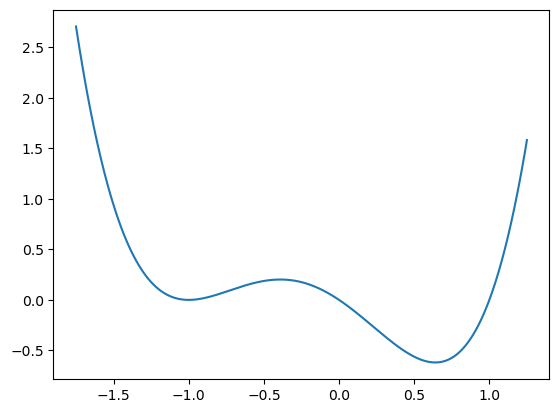

In [7]:
p = plot(x,f(x))
display(p)

In [8]:
function newton_step(x0)
    xn = x0 - ∇2f(x0)\∇f(x0)
end

newton_step (generic function with 1 method)

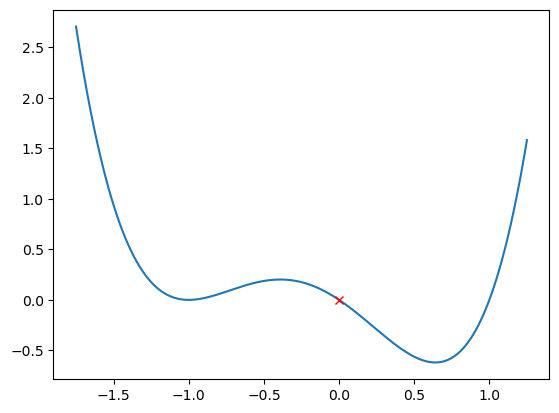

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x167731dc0>

In [9]:
xguess = 0.0
plot(x, f(x))
plot(xguess, f(xguess), "rx")

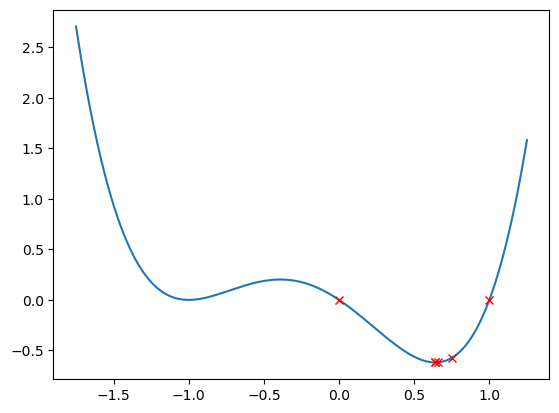

6-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x31a273d10>
 PyObject <matplotlib.lines.Line2D object at 0x31a273e00>
 PyObject <matplotlib.lines.Line2D object at 0x31a273f20>
 PyObject <matplotlib.lines.Line2D object at 0x31a271070>
 PyObject <matplotlib.lines.Line2D object at 0x31a03aff0>
 PyObject <matplotlib.lines.Line2D object at 0x31a2a8260>

In [18]:
xnew = newton_step(xguess[end])
xguess = [xguess xnew]
plot(x, f(x))
plot(xguess, f(xguess), "rx")

In [11]:
∇2f(0.0)

-2.0

In [19]:
function regularized_newton_step(x0)
    β = 1.0
    H = ∇2f(x0)
    while !isposdef(H)
        H = H + β*I
    end
    xn = x0 - H\∇f(x0)
end

regularized_newton_step (generic function with 1 method)

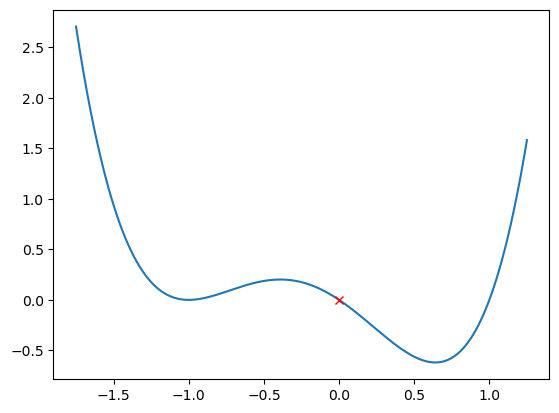

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x31a40c3b0>

In [22]:
xguess = 0.0
plot(x, f(x))
plot(xguess, f(xguess), "rx")

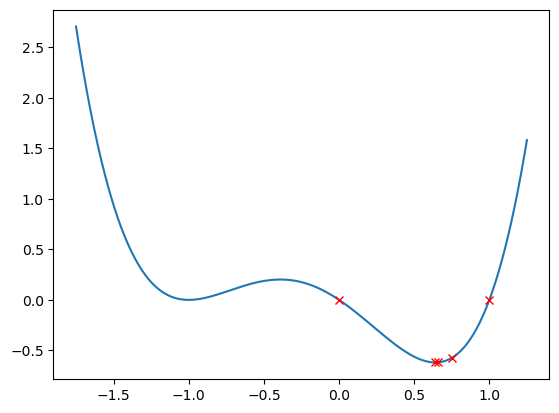

5-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x31a5fcd70>
 PyObject <matplotlib.lines.Line2D object at 0x31a464a10>
 PyObject <matplotlib.lines.Line2D object at 0x31a5fcf50>
 PyObject <matplotlib.lines.Line2D object at 0x31a5fd070>
 PyObject <matplotlib.lines.Line2D object at 0x31a1bc140>

In [26]:
xnew = regularized_newton_step(xguess[end])
xguess = [xguess xnew]
plot(x, f(x))
plot(xguess, f(xguess), "rx")